# Guide to Image Noise Reduction Techniques in Python
Noise in images is inevitable. It can arise from sensor errors, environmental conditions, or during image transmission. Reducing this noise is crucial for improving the quality of images, especially in computer vision applications. In this article, we will explore several popular noise filtering techniques and implement them using Python's `PIL`, `numpy`, and `scipy` libraries.
This notebook is written as part of my Machine Learning and Data Science MSc at Imperial College London.

## What is Image Noise?
Image noise is a random variation of brightness or color information in images. It appears as grainy or speckled spots that distort the visual quality. The common types of noise include:

- **Gaussian Noise**: Noise that follows a normal distribution.
- **Salt-and-Pepper Noise**: Random occurrences of black and white pixels.
- **Poisson Noise**: Noise that follows a Poisson distribution, often seen in low-light images.

To tackle these, we'll dive into several noise filtering techniques commonly used in digital image processing.

## Spatial Noise Filters
Spatial noise filters are straightforward methods that operate directly on the image's pixels to reduce noise. Here, we'll explore three common spatial filters: Mean Filter, Median Filter, and Gaussian Filter.
### 1. Mean Filter

The Mean Filter, also known as the average filter, replaces each pixel's value with the average of its neighboring pixels. This process smooths the image, reducing noise, but at the cost of blurring the edges.

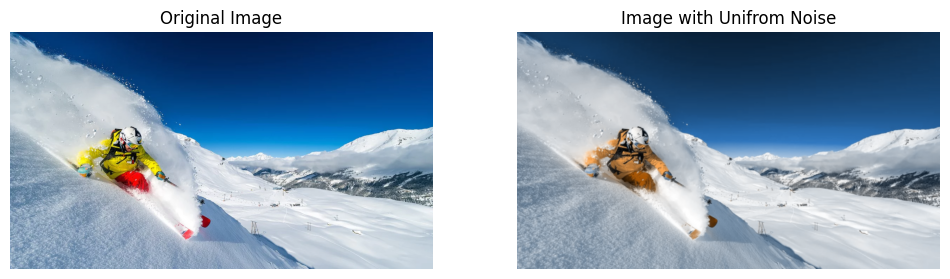

In [3]:
from PIL import Image
import numpy as np
from scipy.ndimage import uniform_filter
import matplotlib.pyplot as plt


# Load the image
image = Image.open('picture.jpg')
image_array = np.array(image)

# Apply mean filter
mean_filtered_image = uniform_filter(image_array, size=3)

# Convert back to image and display
filtered_image = Image.fromarray(mean_filtered_image)


# Display the original and noisy images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(filtered_image)
ax[1].set_title('Image with Mean Filter')
ax[1].axis('off')

plt.show()


The `uniform_filter` from `scipy.ndimage` computes the mean of the pixel values in a specified neighborhood (`size=3`), producing a smoothed image.

### 2. Median Filter
The Median Filter is highly effective in removing salt-and-pepper noise. It works by replacing each pixel's value with the median of its neighboring pixel values, preserving the edges much better than the mean filter.

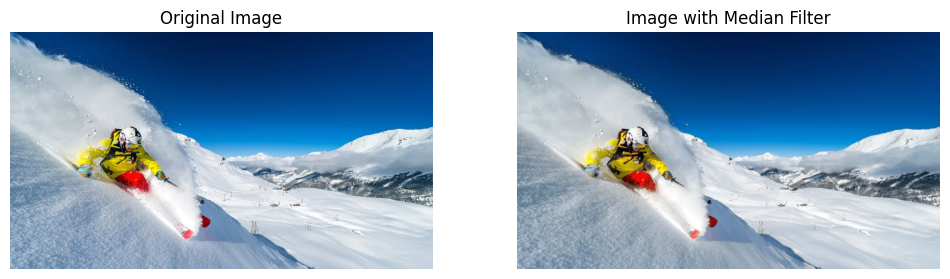

In [7]:
from PIL import Image
import numpy as np
from scipy.ndimage import median_filter

# Load the image
image = Image.open('picture.jpg')
image_array = np.array(image)

# Apply median filter
median_filtered_image = median_filter(image_array, size=3)

# Display the original and noisy images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(median_filtered_image)
ax[1].set_title('Image with Median Filter')
ax[1].axis('off')

plt.show()


### 3. Gaussian Filter
A Gaussian Filter reduces noise and detail by using a Gaussian distribution. It’s often used to blur images slightly before applying more advanced techniques.

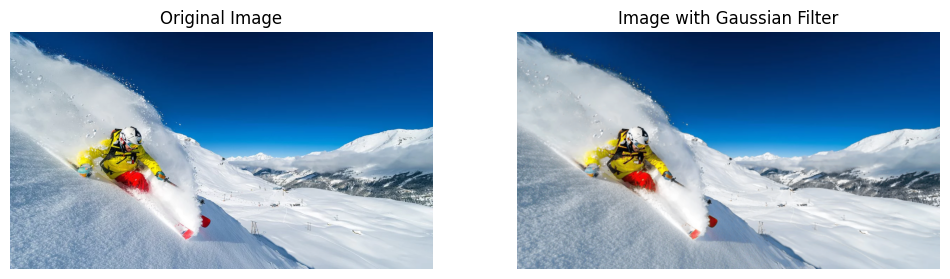

In [8]:
from PIL import Image
import numpy as np
from scipy.ndimage import gaussian_filter

# Load the image
image = Image.open('picture.jpg')
image_array = np.array(image)

# Apply Gaussian filter
gaussian_filtered_image = gaussian_filter(image_array, sigma=1)

# Display the original and noisy images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(median_filtered_image)
ax[1].set_title('Image with Gaussian Filter')
ax[1].axis('off')

plt.show()

## Selective Filters
Selective filters are more advanced and tailored for specific noise types or to achieve a particular effect. They consider both the spatial proximity and pixel intensity differences.

### 4. Adaptive Median Filter
The Adaptive Median Filter dynamically adjusts its filter size based on the noise level. It handles larger noise patches better than the standard median filter.




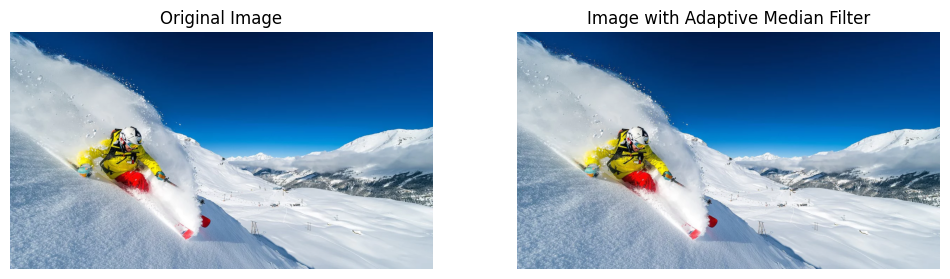

In [11]:
from PIL import Image
import numpy as np
from scipy.ndimage import generic_filter

# Load the image
image = Image.open('picture.jpg')
image_array = np.array(image)

# Adaptive median filter function
def adaptive_median_filter(pixels):
    center = pixels[len(pixels) // 2]
    sorted_pixels = sorted(pixels)
    median = sorted_pixels[len(sorted_pixels) // 2]
    return median if center == 0 or center == 255 else center

filtered_image_array = generic_filter(image_array, adaptive_median_filter, size=3)

# Display the original and noisy images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(filtered_image_array)
ax[1].set_title('Image with Adaptive Median Filter')
ax[1].axis('off')

plt.show()


This approach adapts to noise patterns in the image, making it more robust against larger areas of corruption caused by salt-and-pepper noise

### 5. Bilateral Filter
The Bilateral Filter smooths images while preserving edges by taking into account both spatial and intensity differences. This means it blurs flat areas while keeping edges sharp.

Bilateral filtering is excellent for denoising while preserving edges, making it suitable for applications where maintaining detail is crucial.

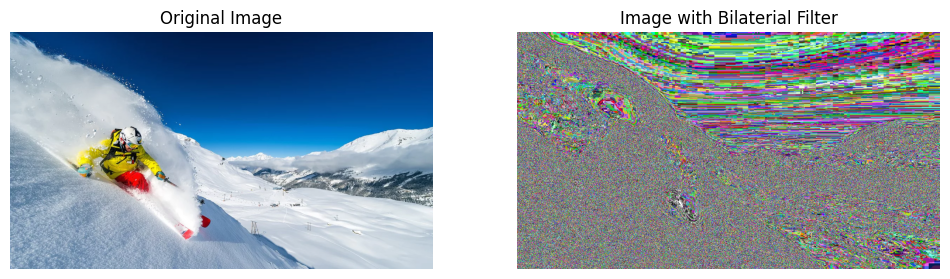

In [12]:
from PIL import Image
import numpy as np
import scipy.ndimage

# Load the image
image = Image.open('picture.jpg')
image_array = np.array(image)

# Bilateral filter implementation
def bilateral_filter(image, sigma_s=15, sigma_r=75):
    filtered_image = scipy.ndimage.gaussian_filter(image, sigma=sigma_s)
    edges = image - filtered_image
    return filtered_image + sigma_r * edges

bilateral_filtered_image = bilateral_filter(image_array)

# Display the original and noisy images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(bilateral_filtered_image)
ax[1].set_title('Image with Bilaterial Filter')
ax[1].axis('off')

plt.show()



## Conclusion
We explored various noise filtering techniques, from simple mean filters to more advanced adaptive and bilateral filters. Each method has its strengths and is suited to specific types of noise. By understanding the characteristics of your image and the noise it contains, you can choose the most effective denoising strategy.

### Summary of Filters:

- **Mean Filter**: Best for general smoothing but may blur edges.
- **Median Filter**: Ideal for removing salt-and-pepper noise.
- **Gaussian Filter**: Useful for general noise reduction while preserving some details.
- **Adaptive Median Filter**: Superior for images with large areas of salt-and-pepper noise.
- **Bilateral Filter**: Balances noise reduction with edge preservation.

### Final Thoughts
When choosing a noise reduction technique, consider the type of noise present and the importance of preserving edges in your image. These Python implementations without cv2 offer an accessible way to enhance image quality in a variety of applications.

If you found this guide helpful, don't forget to share it with others or leave your thoughts in the comments below. Happy coding!

## Synthesis: Applying Denoising Filters on Different Noisy Images
We will generate different types of noise (Gaussian, impulse, uniform, and Rayleigh) on the original image and then apply a series of denoising filters to them. Finally, we'll display the images in a grid format, with each row representing the result of a different filter applied to each type of noisy image

### Step 1: Generating Noisy Images
Let's create the noisy images using different noise types.

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open('picture.jpg')
image_array = np.array(image)

# Generate different types of noise
def add_gaussian_noise(image, mean=0, sigma=25):
    gaussian_noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian_noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def add_impulse_noise(image, prob=0.05):
    noisy_image = image.copy()
    salt_pepper = np.random.rand(*image.shape[:2])
    noisy_image[salt_pepper < prob / 2] = 0  # salt (black pixels)
    noisy_image[salt_pepper > 1 - prob / 2] = 255  # pepper (white pixels)
    return noisy_image

def add_uniform_noise(image, low=-50, high=50):
    uniform_noise = np.random.uniform(low, high, image.shape)
    noisy_image = image + uniform_noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def add_rayleigh_noise(image, scale=30):
    rayleigh_noise = np.random.rayleigh(scale, image.shape)
    noisy_image = image + rayleigh_noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Create noisy images
gaussian_noisy = add_gaussian_noise(image_array)
impulse_noisy = add_impulse_noise(image_array)
uniform_noisy = add_uniform_noise(image_array)
rayleigh_noisy = add_rayleigh_noise(image_array)


### Step 2: Defining the Denoising Filters
We will define the different denoising filters that will be applied to each noisy image.



In [9]:
from scipy.ndimage import generic_filter
from scipy.ndimage import median_filter as scipy_median_filter

# Arithmetic Mean Filter
def arithmetic_mean_filter(image):
    return generic_filter(image, np.mean, size=3)

# Geometric Mean Filter
def geometric_mean_filter(image):
    return np.exp(generic_filter(np.log(image + 1e-6), np.mean, size=3))

# Harmonic Mean Filter
def harmonic_mean_filter(image):
    return generic_filter(1 / (image + 1e-6), np.mean, size=3) ** -1
# Median Filter
def median_filter(image):
    return scipy_median_filter(image, size=3)

# Inverse Harmonic Mean Filter
def inverse_harmonic_mean_filter(image, k=1.5):
    def filter_function(pixels):
        numerator = np.sum(pixels ** (k + 1))
        denominator = np.sum(pixels ** k) + 1e-6  # avoid division by zero
        return numerator / denominator
    return generic_filter(image, filter_function, size=3)

# Nonlinear Mean Filter (Adaptive Filter)
def nonlinear_mean_filter(image):
    return generic_filter(image, lambda x: np.median(x) if np.std(x) > 20 else np.mean(x), size=3)

# Maximum and Minimum Value Filter
def max_filter(image):
    return generic_filter(image, np.max, size=3)

def min_filter(image):
    return generic_filter(image, np.min, size=3)

# Mid-Point Filter
def mid_point_filter(image):
    return (max_filter(image) + min_filter(image)) / 2


### Step 3: Applying Filters to the Noisy Images and Displaying the Results
We will apply each filter to the noisy images and display them in a grid format.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

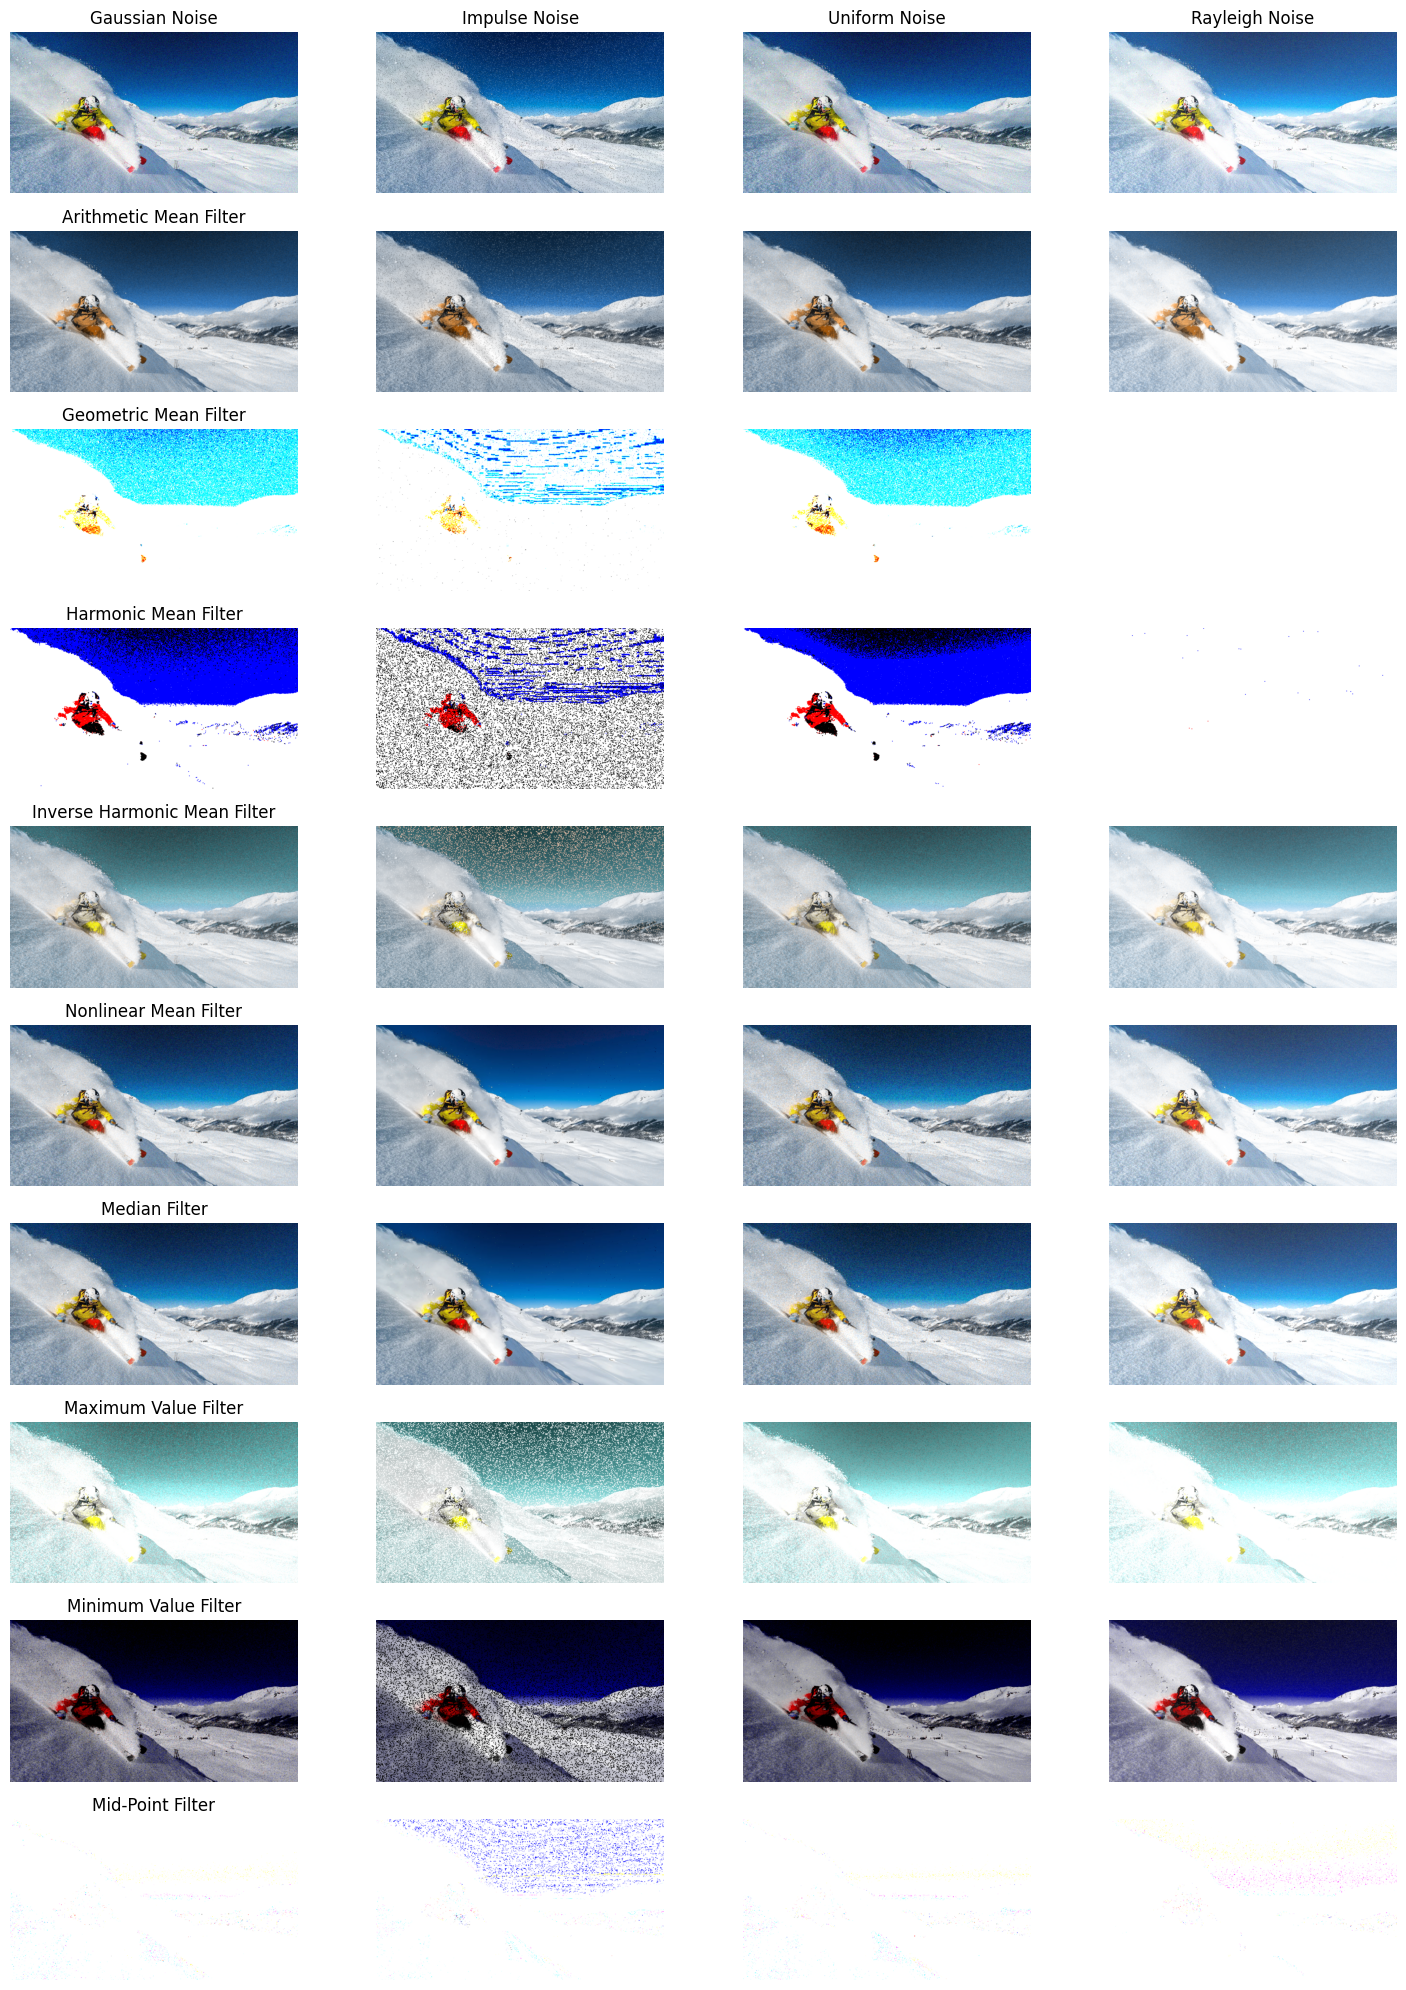

In [10]:
# List of noisy images and their titles
noisy_images = [gaussian_noisy, impulse_noisy, uniform_noisy, rayleigh_noisy]
noisy_titles = ['Gaussian Noise', 'Impulse Noise', 'Uniform Noise', 'Rayleigh Noise']

# List of filter functions and their titles
filters = [
    (arithmetic_mean_filter, 'Arithmetic Mean Filter'),
    (geometric_mean_filter, 'Geometric Mean Filter'),
    (harmonic_mean_filter, 'Harmonic Mean Filter'),
    (inverse_harmonic_mean_filter, 'Inverse Harmonic Mean Filter'),
    (nonlinear_mean_filter, 'Nonlinear Mean Filter'),
    (median_filter, 'Median Filter'),
    (max_filter, 'Maximum Value Filter'),
    (min_filter, 'Minimum Value Filter'),
    (mid_point_filter, 'Mid-Point Filter')
]

# Plotting the results
fig, axes = plt.subplots(len(filters) + 1, len(noisy_images), figsize=(15, 20))

# Display the original noisy images in the first row
for i, (noisy_image, title) in enumerate(zip(noisy_images, noisy_titles)):
    axes[0, i].imshow(noisy_image, cmap='gray')
    axes[0, i].set_title(title)
    axes[0, i].axis('off')

# Apply each filter to each noisy image and display the result
for row, (filter_func, filter_name) in enumerate(filters, start=1):
    for col, noisy_image in enumerate(noisy_images):
        filtered_image = filter_func(noisy_image)
        axes[row, col].imshow(filtered_image, cmap='gray')
        axes[row, col].set_title(filter_name if col == 0 else '')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()


This synthesis allows you to visually compare how each denoising filter performs on different types of noise. Here are some observations:

- **Arithmetic** and **Geometric Mean** Filters are effective at smoothing Gaussian noise but may blur the image.
- **Median Filter** is especially powerful at removing impulse noise (salt-and-pepper) while preserving edges.
- **Maximum and Minimum Filters** can enhance or diminish particular features, depending on the application.
- **Mid-Point Filter** provides a balance between noise reduction and detail preservation.
- **Nonlinear Filters** adapt to local noise characteristics, making them versatile in various scenarios.

This comparative approach helps identify the best denoising strategy based on the type of noise present in your image. This comprehensive set of visual results can be a valuable reference in selecting the most suitable noise reduction technique for your image processing tasks.